# 1) Import Libraries

In [1]:
    import re
    import datetime
    import calendar
    from math import sqrt

    import pandas as pd
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    %matplotlib inline

In [2]:
import seaborn as sns
sns.set_style('ticks')

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 2) Read Data

In [4]:
def parse_date_string(x):
    dt_obj = datetime.datetime.strptime(x, "%b-%y")
    day=calendar.monthrange(dt_obj.year, dt_obj.month)[1]
    last_date = '{}'.format(day)+datetime.datetime.strftime(dt_obj, "-%m-%Y")
    return datetime.datetime.strptime(last_date, "%d-%m-%Y")

In [5]:
df = pd.read_csv('Storage data.csv')
display(df.head())

,Months,Storage
0,Jan-19,790GB
1,Feb-19,1422GB
2,Mar-19,1580GB
3,Apr-19,2054GB
4,May-19,1896GB


In [6]:
#Change Months column from string to datetime format
df['Months'] = df['Months'].apply(lambda x: parse_date_string(x))

df.set_index('Months', inplace=True)

#Change the Price Column to integers
df['Storage']=df['Storage'].apply(lambda x:float(re.match(r'[0-9]*', x).group()))
df

,Storage
Months,
2019-01-31,790.0
2019-02-28,1422.0
2019-03-31,1580.0
2019-04-30,2054.0
2019-05-31,1896.0
2019-06-30,2370.0
2019-07-31,3002.0
2019-08-31,3792.0
2019-09-30,4108.0


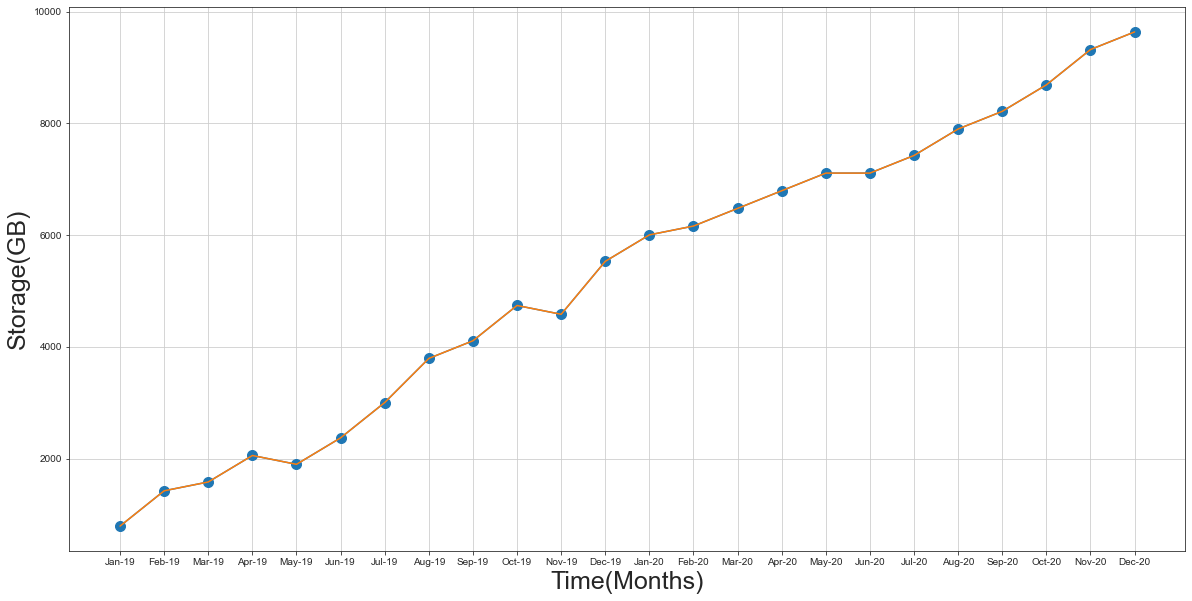

In [7]:
fig = plt.figure(figsize=(20,10))
plt.xlabel('Time(Months)', fontsize=25)
plt.ylabel('Storage(GB)', fontsize=25)
plt.grid()
plt.plot(pd.Series(df.index).apply(lambda x: datetime.datetime.strftime(x, "%b-%y")), df['Storage'], '-o', markersize=10)
plt.plot(pd.Series(df.index).apply(lambda x: datetime.datetime.strftime(x, "%b-%y")), df['Storage'], )
plt.savefig('Storagetest.jpeg')
plt.show()

# 3)Split the data into train and test data

In [8]:
n_obs = df.shape[0]

train_split_percentage = 0.85

train_data = df.iloc[:round(n_obs * train_split_percentage)]
test_data = df.iloc[round(n_obs * train_split_percentage):]

In [9]:
# Display the Test and train data
print(train_data.shape)
print(test_data.shape)

(20, 1)
(4, 1)


In [10]:
display(train_data.tail())
display(test_data.head())

,Storage
Months,
2020-04-30,6794.0
2020-05-31,7110.0
2020-06-30,7110.0
2020-07-31,7426.0
2020-08-31,7900.0


,Storage
Months,
2020-09-30,8216.0
2020-10-31,8690.0
2020-11-30,9322.0
2020-12-31,9638.0


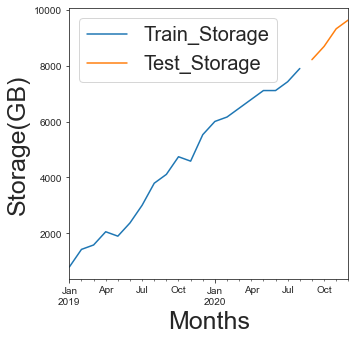

In [11]:
plt.figure(figsize=(5,5))
plt.xlabel('Time(Time Duration)', fontsize=25)
plt.ylabel('Storage(GB)', fontsize=25)
plt.rc('legend',fontsize=20)
train_data['Storage'].rename('Train_Storage').plot(legend=True)
test_data['Storage'].rename('Test_Storage').plot(legend=True)

# 4)Finding differencing order "d"

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adf_test_result = adfuller(df['Storage'])
adf_test_result

(-0.056758529003104775,
 0.9535788295314206,
 1,
 22,
 {'1%': -3.769732625845229,
  '5%': -3.005425537190083,
  '10%': -2.6425009917355373},
 198.539120180961)

In [14]:
adftest_result = pd.Series(adf_test_result[:4], index=["Adf test statistic", "p-value", "number of lags", "number of observations"])
adftest_result

Adf test statistic        -0.056759
p-value                    0.953579
number of lags             1.000000
number of observations    22.000000
dtype: float64

In [15]:
from statsmodels.tsa.statespace.tools import diff

In [16]:
df['Storage'].head()

Months
2019-01-31     790.0
2019-02-28    1422.0
2019-03-31    1580.0
2019-04-30    2054.0
2019-05-31    1896.0
Name: Storage, dtype: float64

In [17]:
df['Storage'].shift(1).head()

Months
2019-01-31       NaN
2019-02-28     790.0
2019-03-31    1422.0
2019-04-30    1580.0
2019-05-31    2054.0
Name: Storage, dtype: float64

In [18]:
diff(df['Storage'], k_diff=1)

Months
2019-02-28    632.0
2019-03-31    158.0
2019-04-30    474.0
2019-05-31   -158.0
2019-06-30    474.0
2019-07-31    632.0
2019-08-31    790.0
2019-09-30    316.0
2019-10-31    632.0
2019-11-30   -158.0
2019-12-31    948.0
2020-01-31    474.0
2020-02-29    158.0
2020-03-31    316.0
2020-04-30    316.0
2020-05-31    316.0
2020-06-30      0.0
2020-07-31    316.0
2020-08-31    474.0
2020-09-30    316.0
2020-10-31    474.0
2020-11-30    632.0
2020-12-31    316.0
Name: Storage, dtype: float64

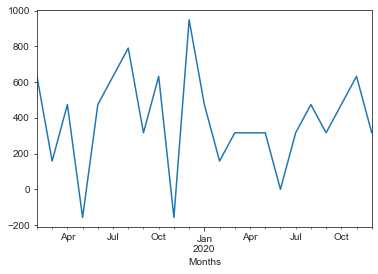

In [19]:
diff(df['Storage'], k_diff=1).plot()

In [20]:
adf_test_result_new = adfuller(diff(df['Storage'], k_diff=1))
adf_test_result_new

(-6.013392146742881,
 1.554144824807133e-07,
 0,
 22,
 {'1%': -3.769732625845229,
  '5%': -3.005425537190083,
  '10%': -2.6425009917355373},
 180.10235100126562)

In [21]:
adftest_result_new = pd.Series(adf_test_result_new[:4], index=["Adf test statistic", "p-value", "number of lags", "number of observations"])
adftest_result_new

Adf test statistic       -6.013392e+00
p-value                   1.554145e-07
number of lags            0.000000e+00
number of observations    2.200000e+01
dtype: float64

In [22]:
from pandas.plotting import lag_plot

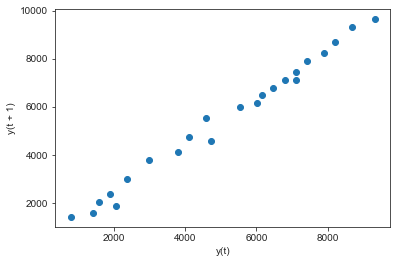

In [23]:
#still very high positive correlation
lag_plot(df['Storage'])

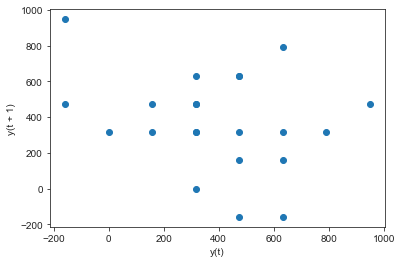

In [24]:
#And now here there is no correlation, since we have taken differencing of the series with a lag of 1
lag_plot(diff(df['Storage'], k_diff=1))

# 5) Finding the MA term (q)

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

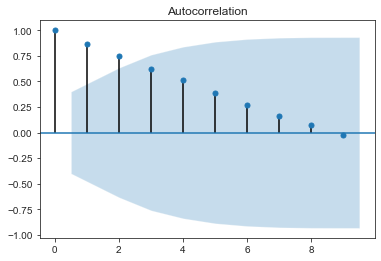

In [26]:
plot_acf(df['Storage'], lags=9);

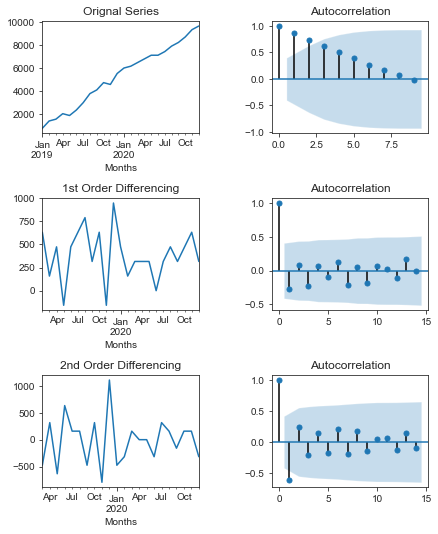

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7,8))

fig.tight_layout(pad=4.5)

df['Storage'].plot(ax=axs[0,0], title="Orignal Series")
plot_acf(df['Storage'], lags=9, title="Autocorrelation", ax=axs[0][1])

diff(df['Storage'], k_diff=1).plot(ax=axs[1,0], title="1st Order Differencing")
plot_acf(diff(df['Storage'], k_diff=1), title="Autocorrelation", ax=axs[1][1])

diff(df['Storage'], k_diff=2).plot(ax=axs[2,0], title="2nd Order Differencing")
plot_acf(diff(df['Storage'], k_diff=2), title="Autocorrelation", ax=axs[2][1])
plt.savefig('Storagetest2.jpeg')
plt.show()

# 6) Finding the AR term (p)

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf

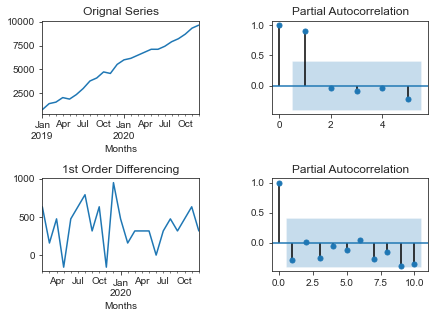

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7,5))

fig.tight_layout(pad=4.5)

df['Storage'].plot(ax=axs[0,0], title="Orignal Series")
plot_pacf(df['Storage'], lags=5, title="Partial Autocorrelation", ax=axs[0][1])

diff(df['Storage'], k_diff=1).plot(ax=axs[1,0], title="1st Order Differencing")
plot_pacf(diff(df['Storage'], k_diff=1), lags=10, title="Partial Autocorrelation", ax=axs[1][1])
plt.savefig('Storagetest.jpeg')
plt.show()

# 5) Auto Arima

In [30]:
from pmdarima import auto_arima

In [31]:
x = auto_arima(train_data['Storage'], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=278.199, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=272.898, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=273.377, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=273.346, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=289.822, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=274.868, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.234 seconds


# 6) Statsmodels Arima


In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
model = ARIMA(train_data['Storage'], order=(0,1,0))

model_fit = model.fit()

In [34]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Storage   No. Observations:                   19
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -134.449
Method:                           css   S.D. of innovations            286.382
Date:                Thu, 10 Jun 2021   AIC                            272.898
Time:                        11:52:05   BIC                            274.787
Sample:                    02-28-2019   HQIC                           273.218
                         - 08-31-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        374.2105     65.701      5.696      0.000     245.440     502.981
==============================================================================
"""

In [35]:
# Forecast
fc, se, conf = model_fit.forecast(steps=len(test_data))
fc, se, conf

(array([8274.21052632, 8648.42105263, 9022.63157895, 9396.84210526]),
 array([286.38207437, 405.0054136 , 496.02830319, 572.76414874]),
 array([[ 7712.91197473,  8835.5090779 ],
        [ 7854.62502844,  9442.21707682],
        [ 8050.43396939,  9994.82918851],
        [ 8274.24500209, 10519.43920843]]))

In [36]:
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
fc_series

Months
2020-09-30    8274.210526
2020-10-31    8648.421053
2020-11-30    9022.631579
2020-12-31    9396.842105
dtype: float64

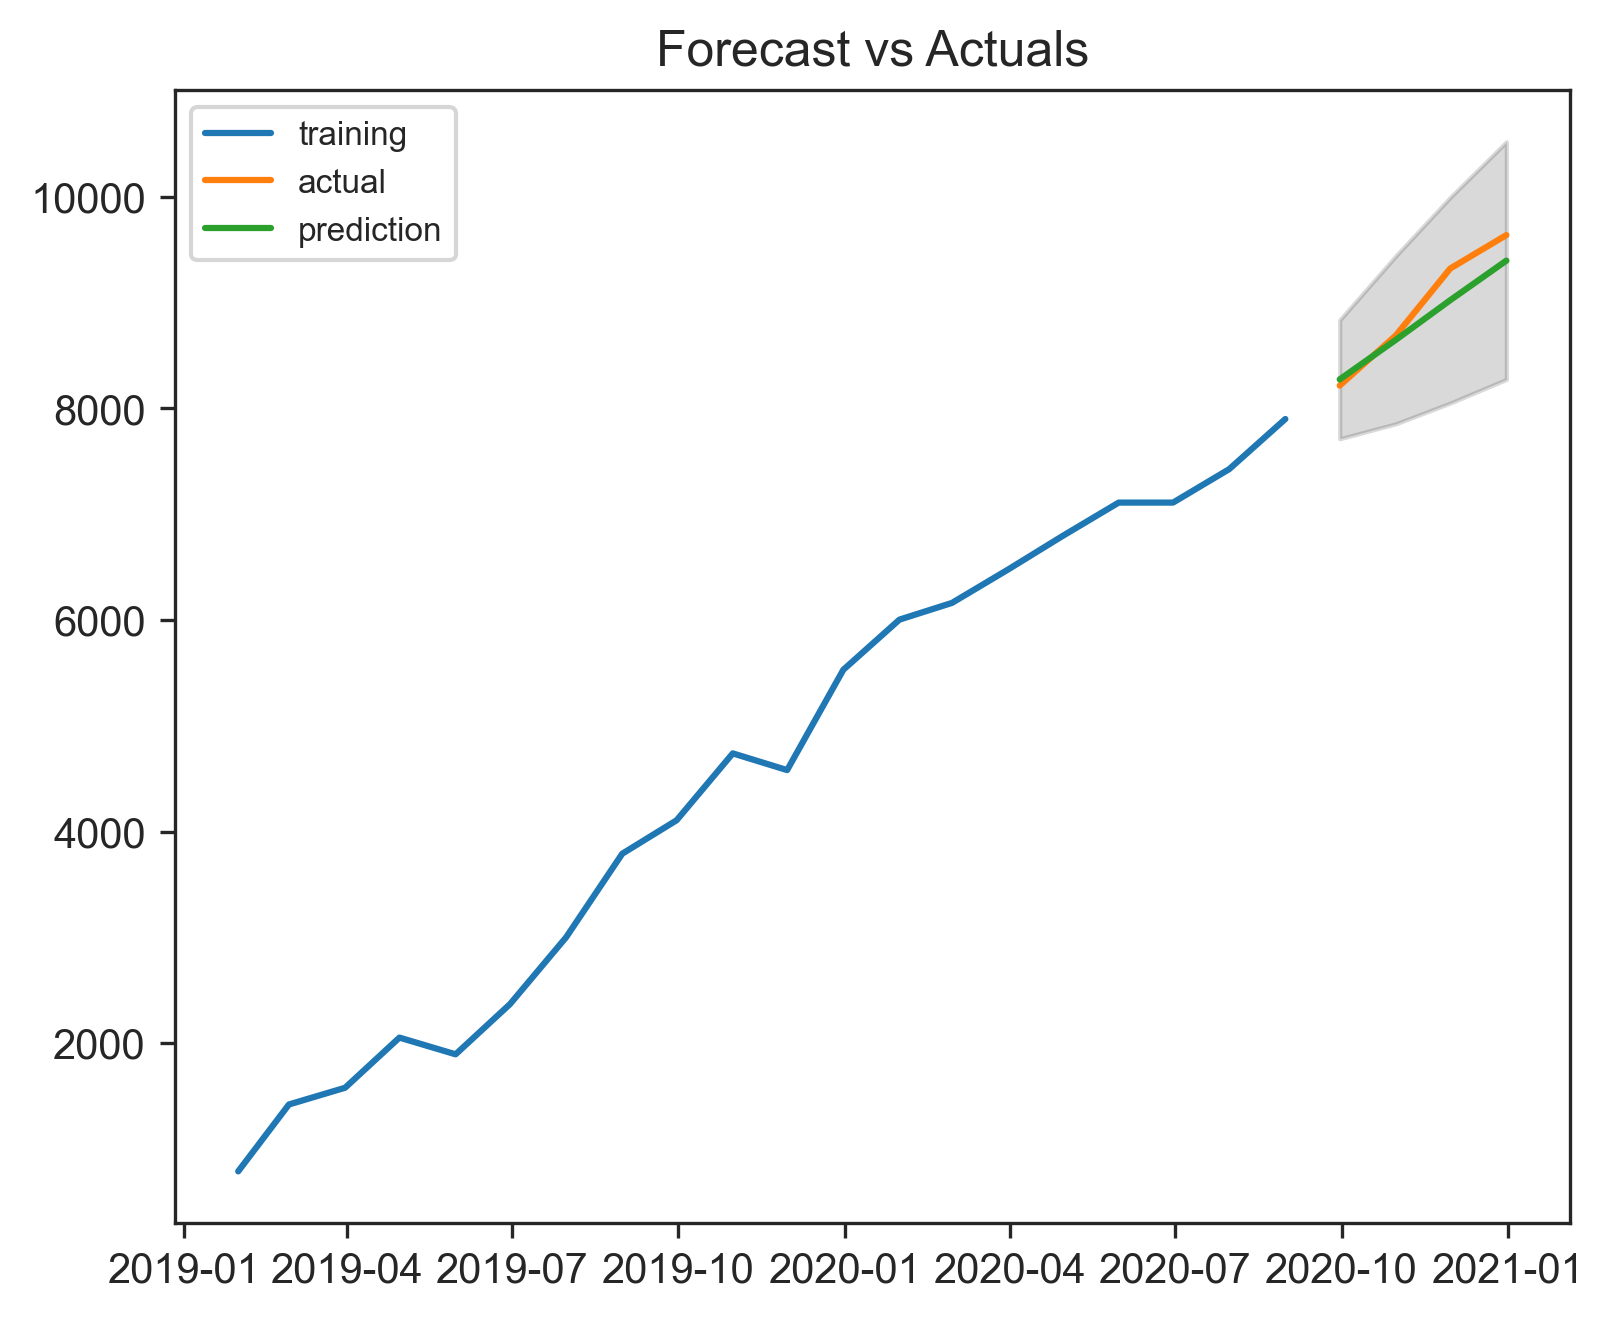

In [37]:
plt.figure(figsize=(6,5), dpi=300)
plt.plot(train_data['Storage'], label='training')
plt.plot(test_data['Storage'], label='actual')
plt.plot(fc_series, label='prediction')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.savefig(' Storage Forecast Vs Actual.jpeg')
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
fc_series

Months
2020-09-30    8274.210526
2020-10-31    8648.421053
2020-11-30    9022.631579
2020-12-31    9396.842105
dtype: float64

In [40]:
test_data['Storage']

Months
2020-09-30    8216.0
2020-10-31    8690.0
2020-11-30    9322.0
2020-12-31    9638.0
Name: Storage, dtype: float64

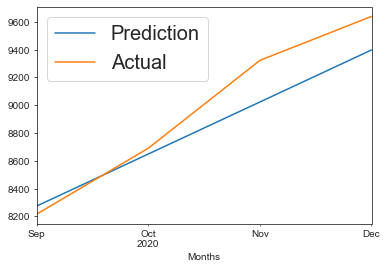

In [41]:
fc_series.rename('Prediction').plot(legend=True)
test_data['Storage'].rename('Actual').plot(legend=True)

In [42]:
sqrt(mean_squared_error(fc_series, test_data['Storage']))

195.5094984621441